# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings('ignore')

Load feature names.

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]
print(x[0:5,])

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

#print(X[0])
#print(feature_names)
#print(Y[0])

[ 0.  0.  0.  0.  1.]
(7000, 126) (1124, 126)


## Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

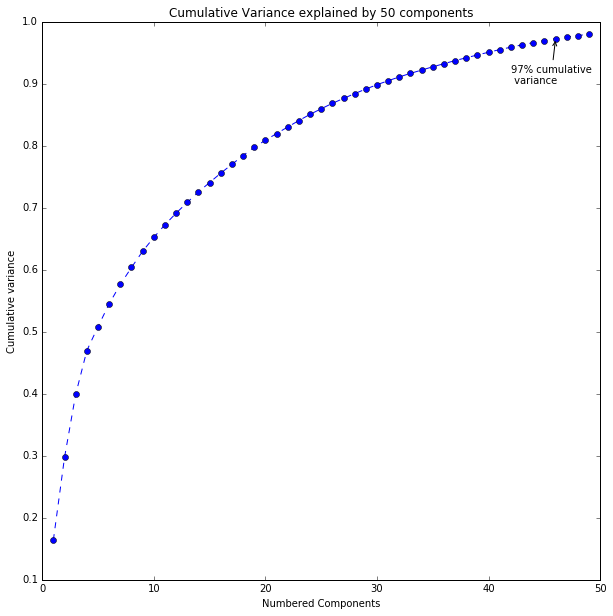

In [4]:
def P1():
### STUDENT START ###
    pca = PCA(n_components = None, copy = True, whiten = False)
    pca.fit(train_data)
    
    # Structure the X axis for 50 parameters
    X_data = np.arange(1, 50, 1)
  
    # Compute cumulative variance over 50 parameters
    Y_data = pca.explained_variance_ratio_[0:49]
    Y_data = np.cumsum(Y_data)

    # Do the Plot dance
    plt.figure(figsize = (10, 10))
    plt.title("Cumulative Variance explained by 50 components")
    plt.plot(X_data, Y_data, '--bo')
    plt.xlabel("Numbered Components")
    plt.ylabel("Cumulative variance")
    plt.annotate('97% cumulative\n variance', xy=(46, 0.9727), xytext = (42, 0.9), arrowprops=dict(arrowstyle="->"))
    
    ### STUDENT END ###

P1()

## PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

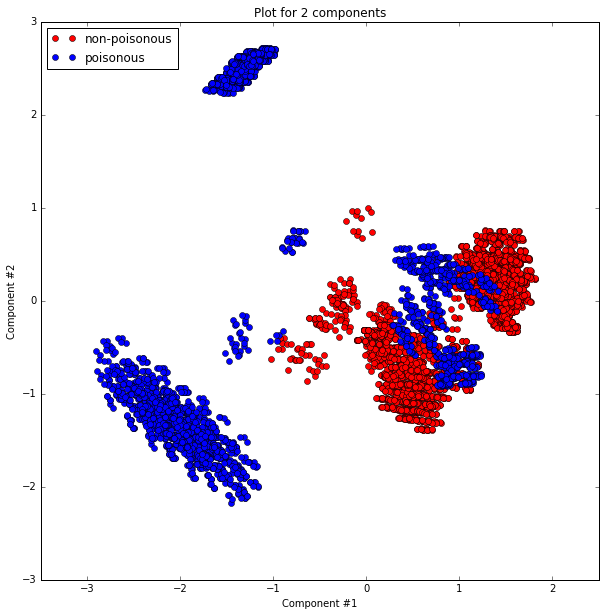

In [5]:
def P2():
### STUDENT START ###
    
    # Try modeling in a couple of ways. play with the configurable parameters
    #pca = PCA(n_components = 2, copy = True, whiten = False)
    pca = PCA(n_components = 2)
    pca.fit(train_data)
    pca_2comp = pca.fit_transform(train_data)
    
    # Separate the positive and negative label coordinates
    X_pos_component = pca_2comp[:, 0][train_labels == 1]
    Y_pos_component = pca_2comp[:, 1][train_labels == 1]
    X_neg_component = pca_2comp[:, 0][train_labels == 0]
    Y_neg_component = pca_2comp[:, 1][train_labels == 0]

    # More of the plot dance!
    plt.figure(figsize = (10, 10))
    plt.xlabel("Component #1")
    plt.ylabel("Component #2")

    # Thow in the scatter plot with different colors
    plt.title("Plot for 2 components")
    plt.plot(X_neg_component, Y_neg_component, "ro", label='non-poisonous')
    plt.plot(X_pos_component, Y_pos_component, "bo", label='poisonous')
    
    # set up the legend and the axis scale
    plt.legend(loc='upper left')
    plt.ylim(-3, 3.0)
    plt.xlim(-3.5, 2.5)
    
### STUDENT END ###

P2()

## Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

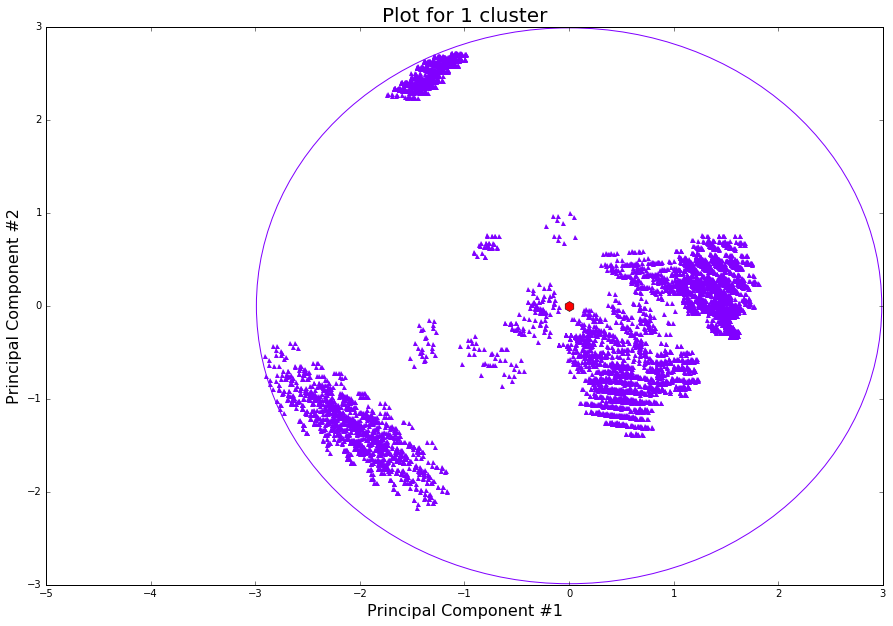

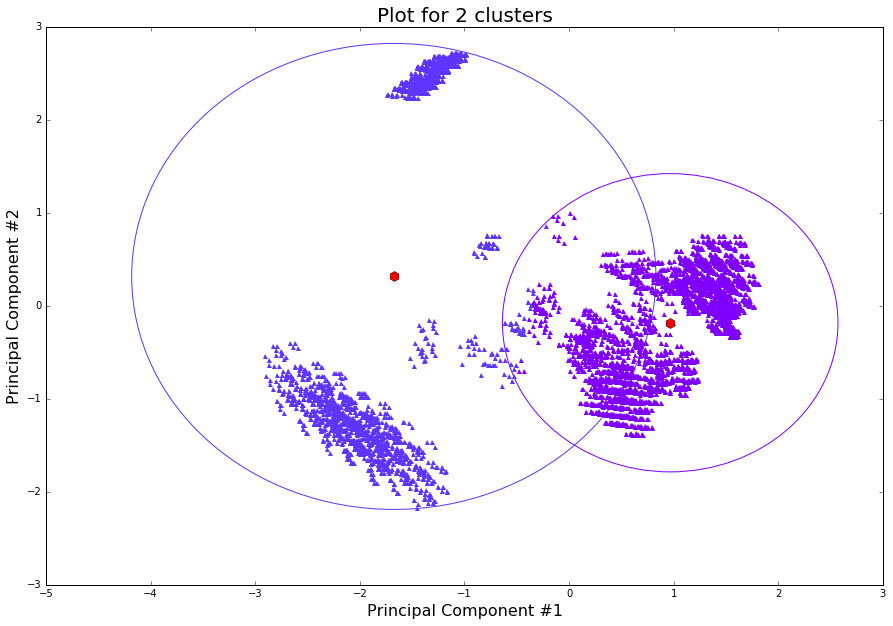

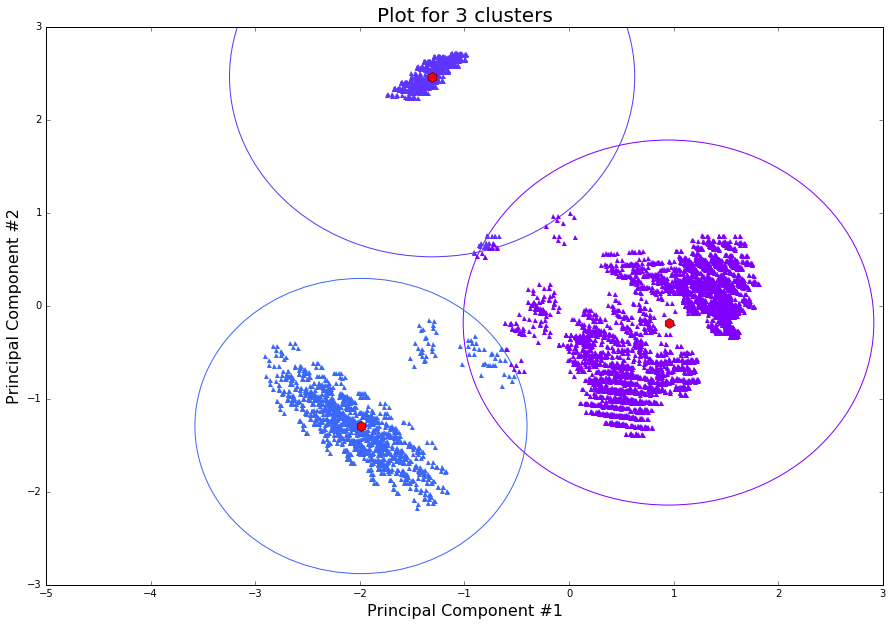

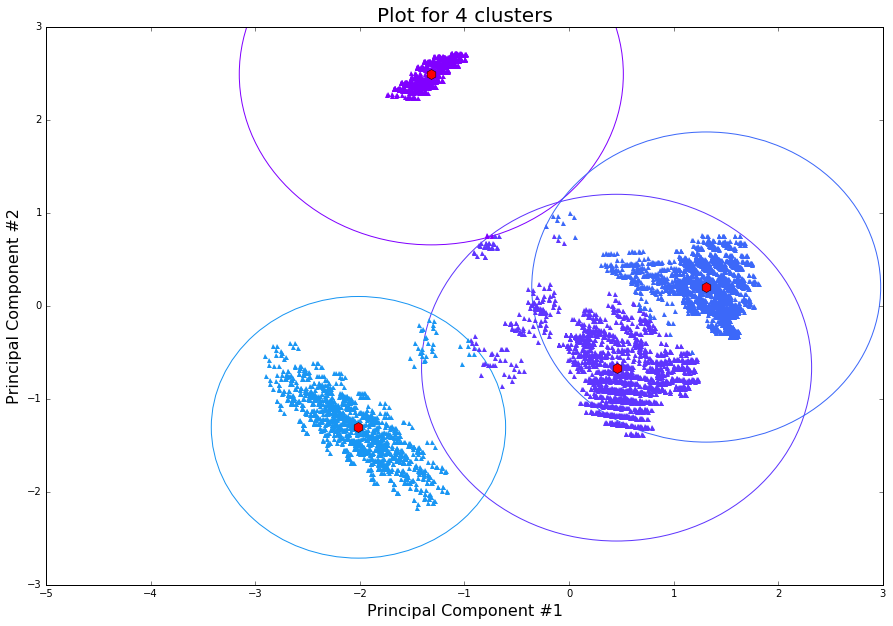

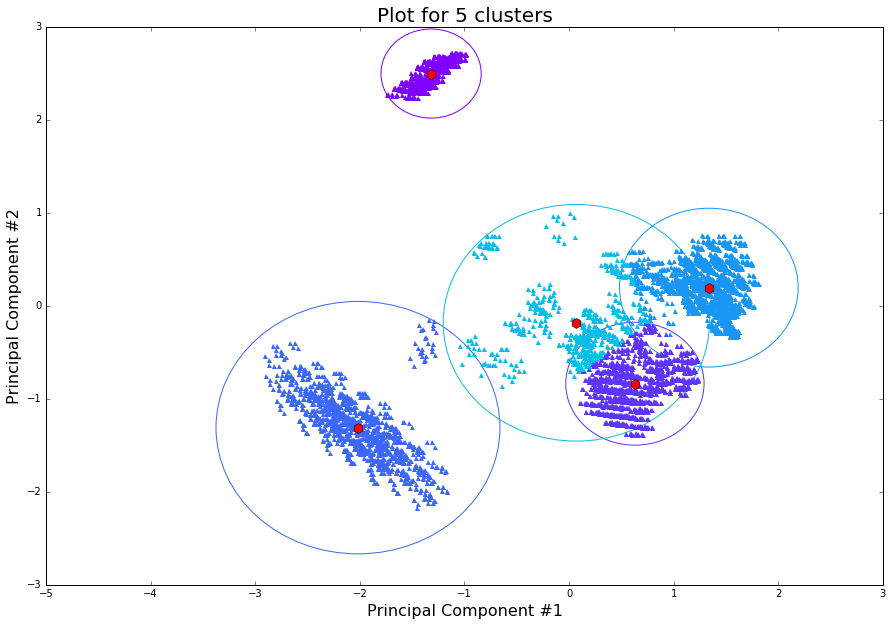

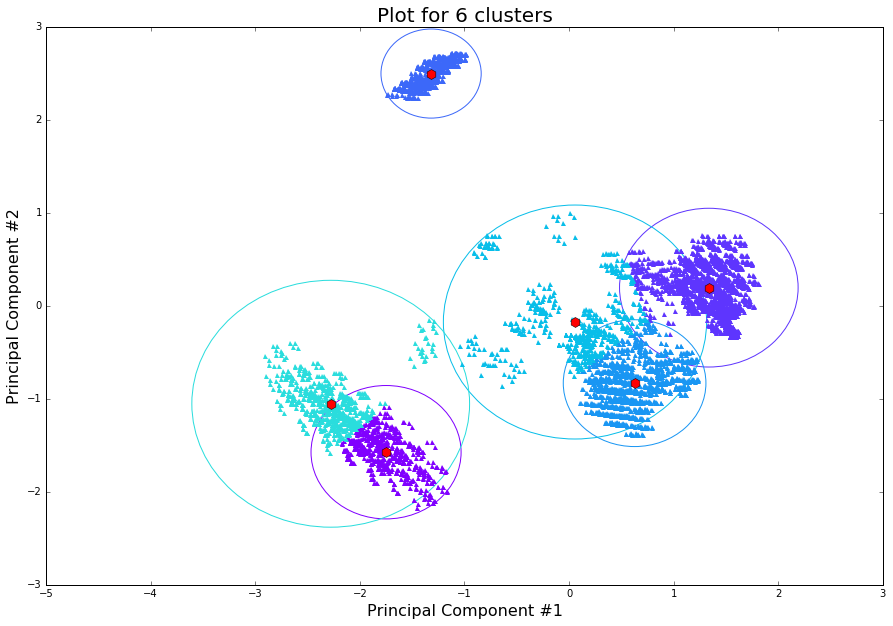

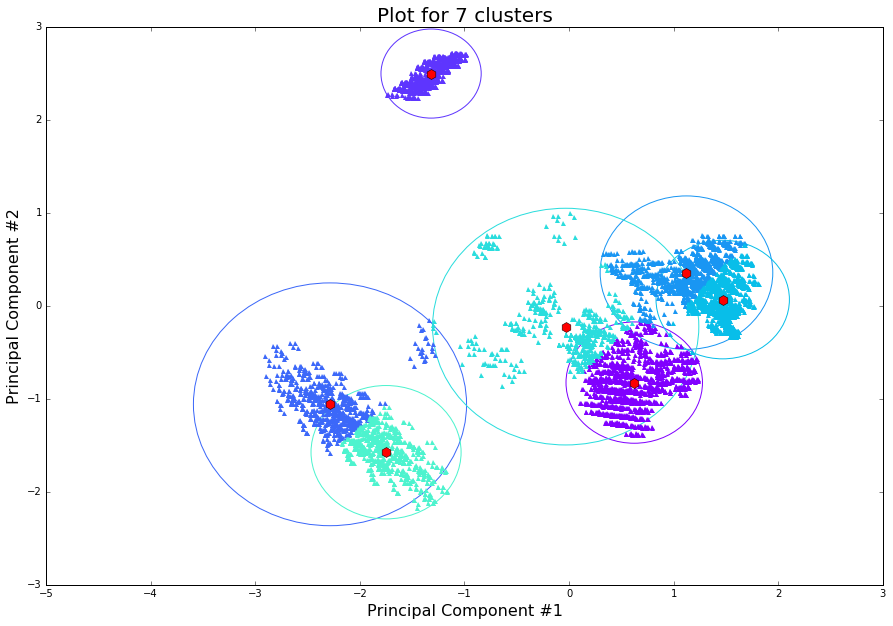

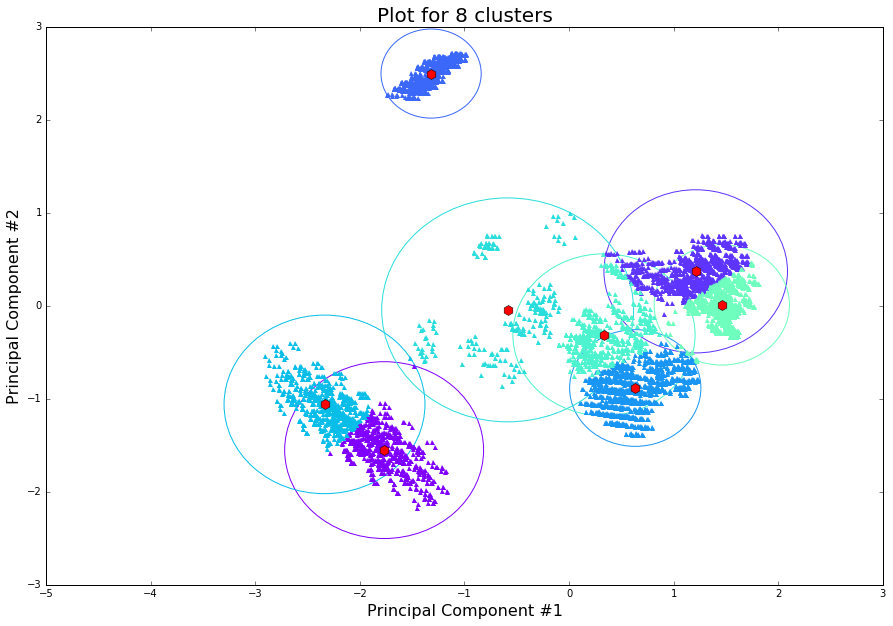

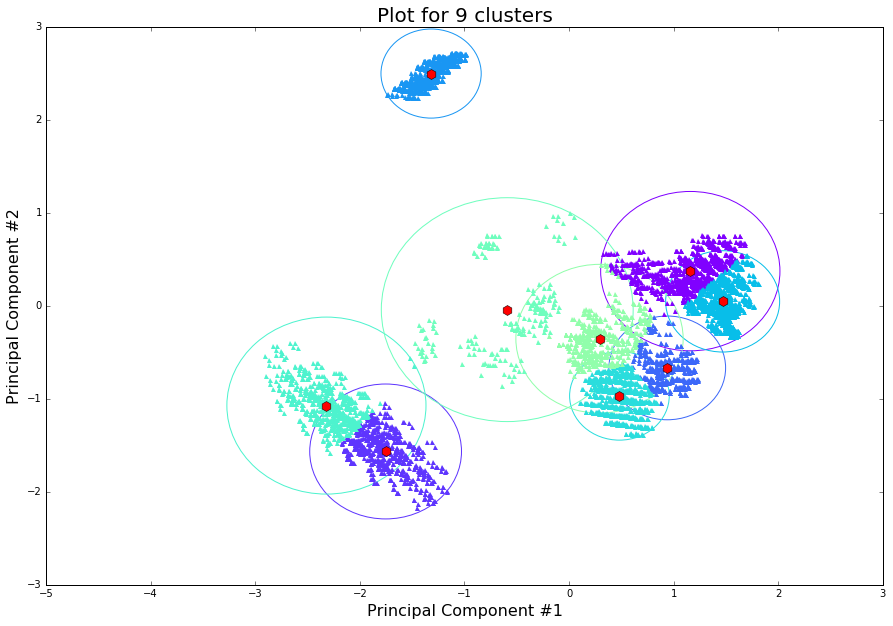

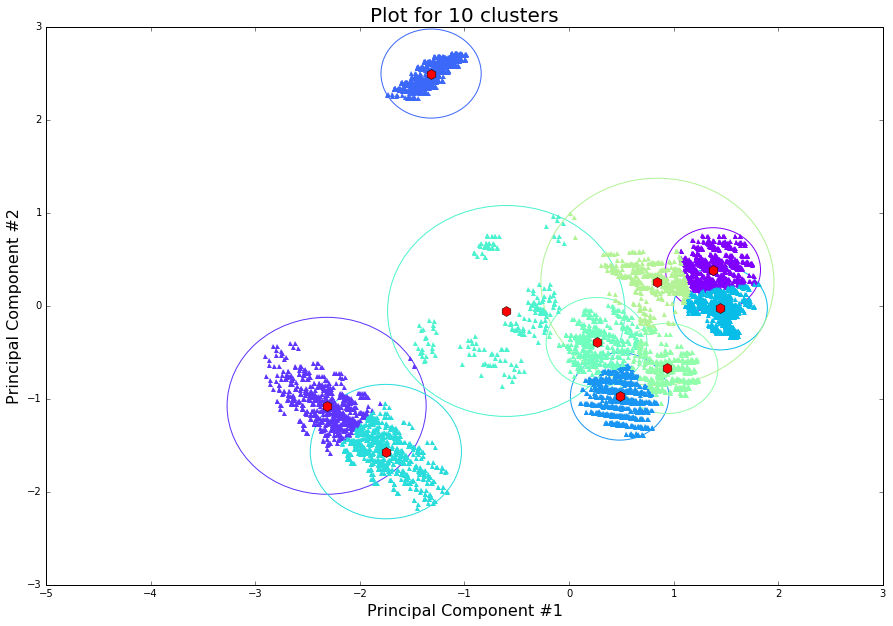

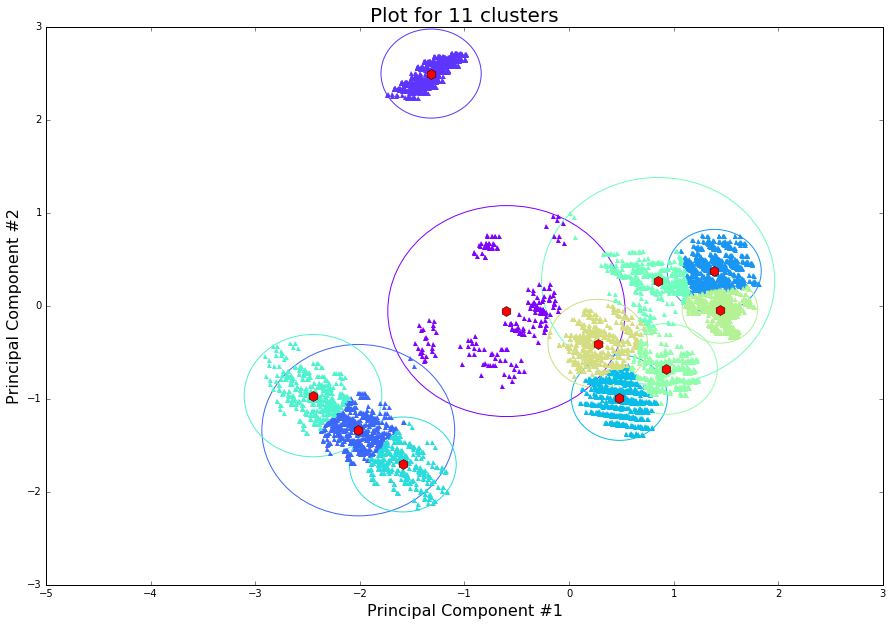

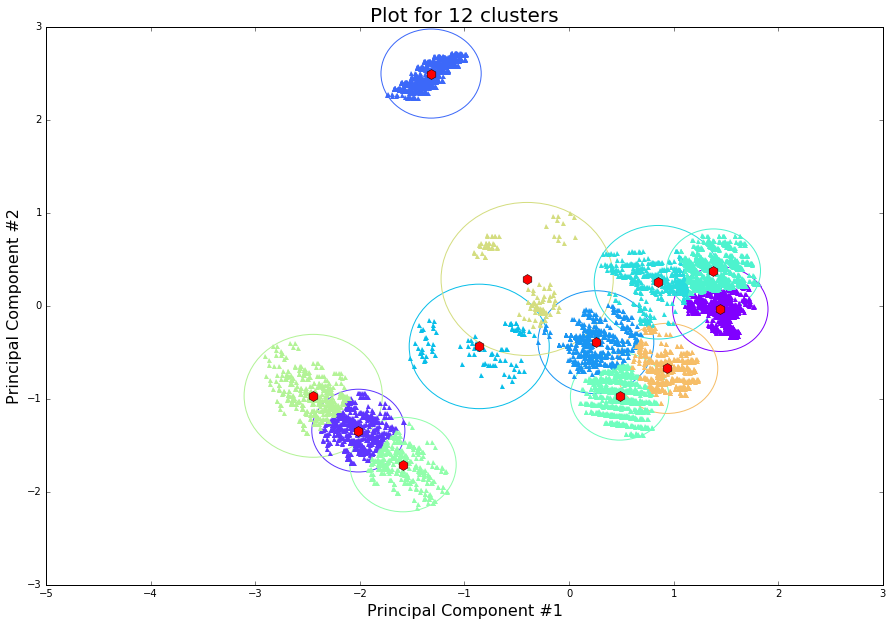

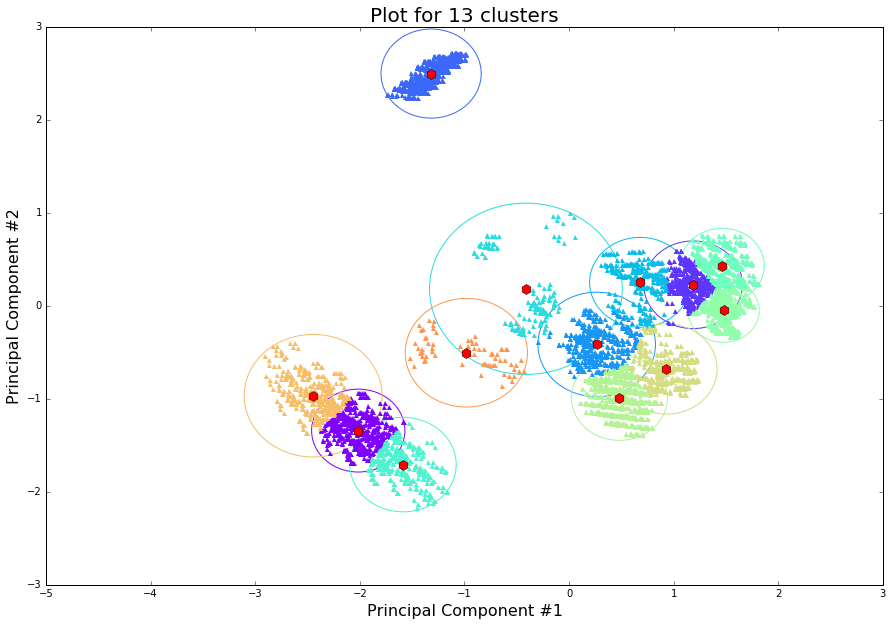

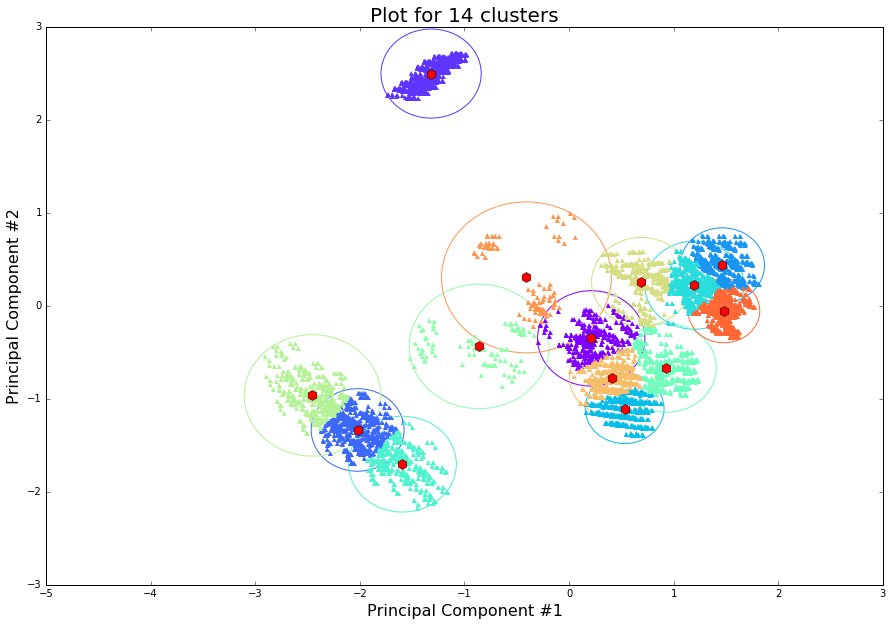

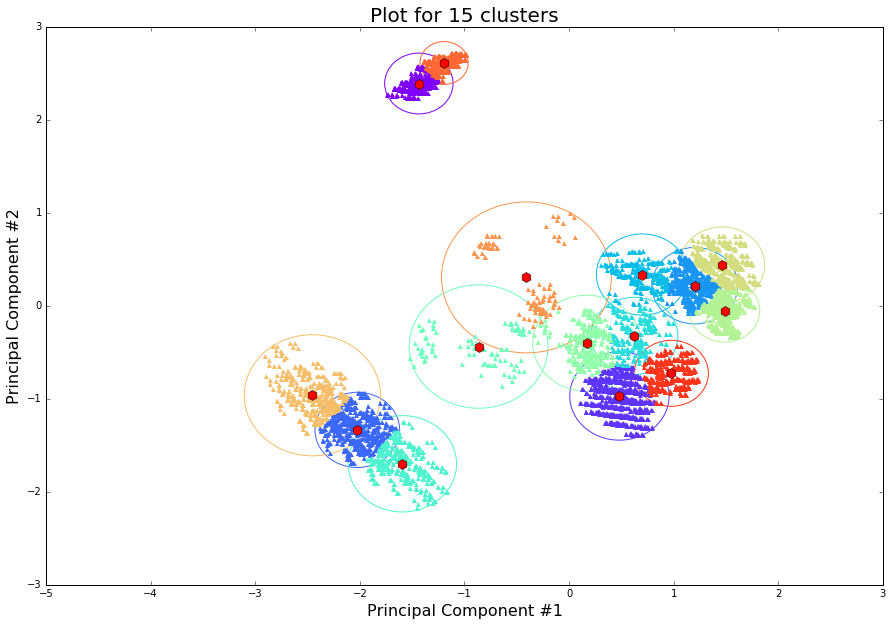

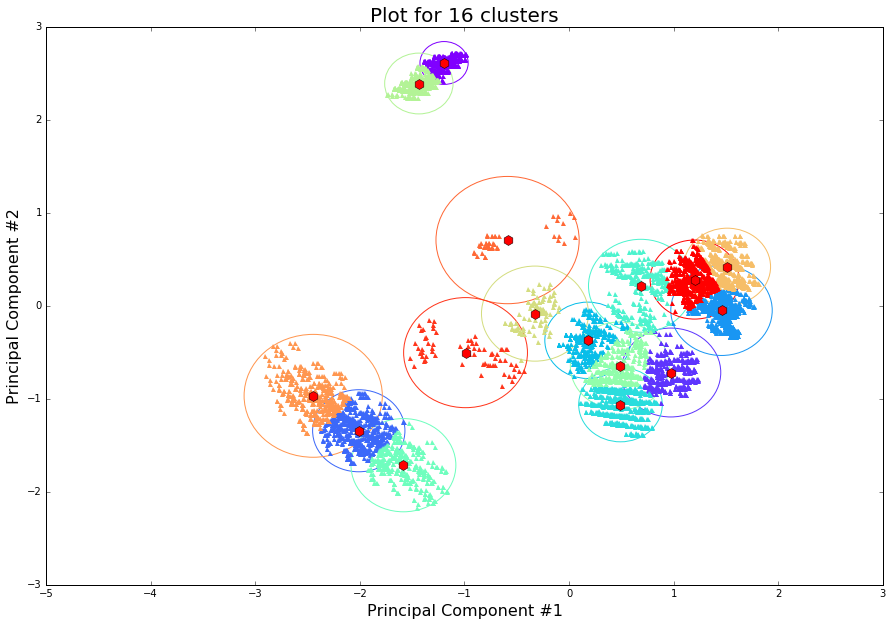

In [6]:
def P3():
### STUDENT START ###
    
    nclusters = 16
    
    # Do the PCA model
    pca = PCA(n_components = 2)
    pca_data = pca.fit_transform(train_data)
    train_data_pca = pca_data
    
    # Some random lgorithm for picking 16 colors
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, 16)]
    
    # Iterate over the 16 clusters
    for k in range (1, nclusters + 1):
        
        # Decide of figure aspect ratio. I like large plots.
        plt.figure(figsize = (15, 10))
        
        # Scale the axes so that plots do not have white space
        plt.axis([-5,3,-3,3])
    
        # KMeans model and fit
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pca_data)
        distance_array = kmeans.transform(pca_data)
        
        # The centers are available via "centers_"
        centers = kmeans.cluster_centers_

        # Cycle through the K clusters and plot. There are 16 centers
        for index in range(0, len(kmeans.cluster_centers_)):
            
            # The array that shows distance from the center for points 
            # within each cluster
            dist = distance_array[kmeans.labels_==index]
        
            # Make the scatter plot of the points
            plt.plot(pca_data[:,0][kmeans.labels_==index], pca_data[:,1][kmeans.labels_==index] ,
                    color = colors[index], ls='None', marker='^', markersize=5, markeredgewidth=0)
            
            # Mark the axes
            
            plt.xlabel("Principal Component #1", fontsize=16)
            plt.ylabel("Principal Component #2", fontsize=16)
    
            # Mark the title
            if index == 0:
                titleTag = " cluster"
            else:
                titleTag = " clusters"
            plt.title("Plot for " + str(index + 1) + titleTag, fontsize=20)
            
            # Compute the radius by looking at the biggest value in distance matrix
            radius = max(dist[:, index])
            
            # Plot the circle
            circle = plt.Circle(centers[index], radius, fill=False, ls='solid', color = colors[index])
            plt.gca().add_patch(circle)

            # mark the center of each cluster
            plt.plot(centers[index][0], centers[index][1], 'rh', markersize=10)
  

### STUDENT END ###

P3()

## (4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

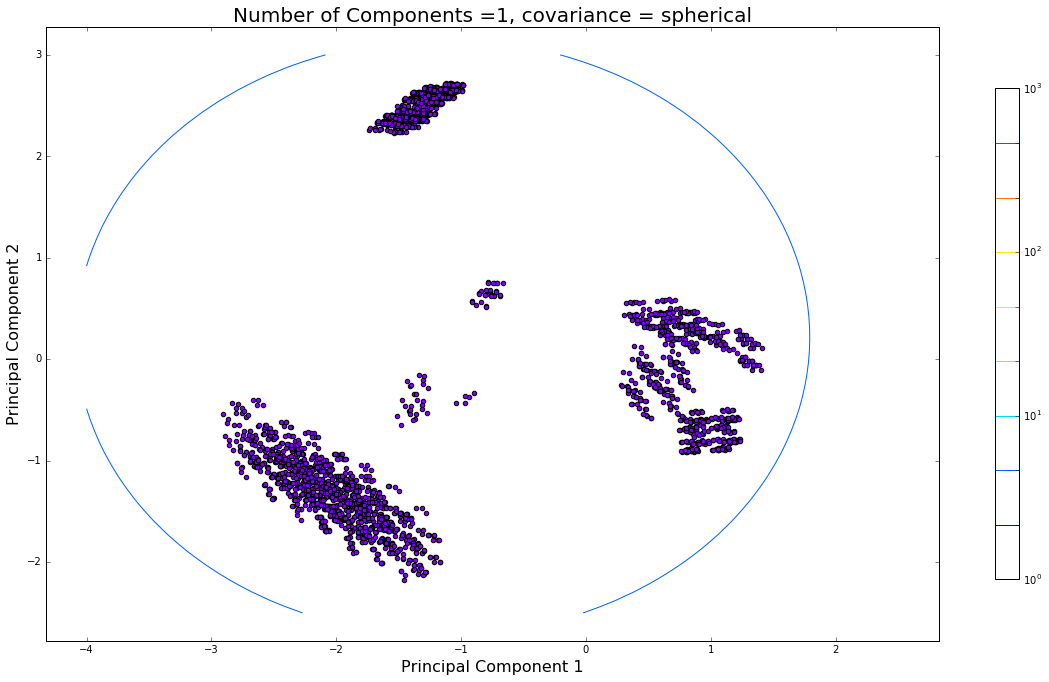

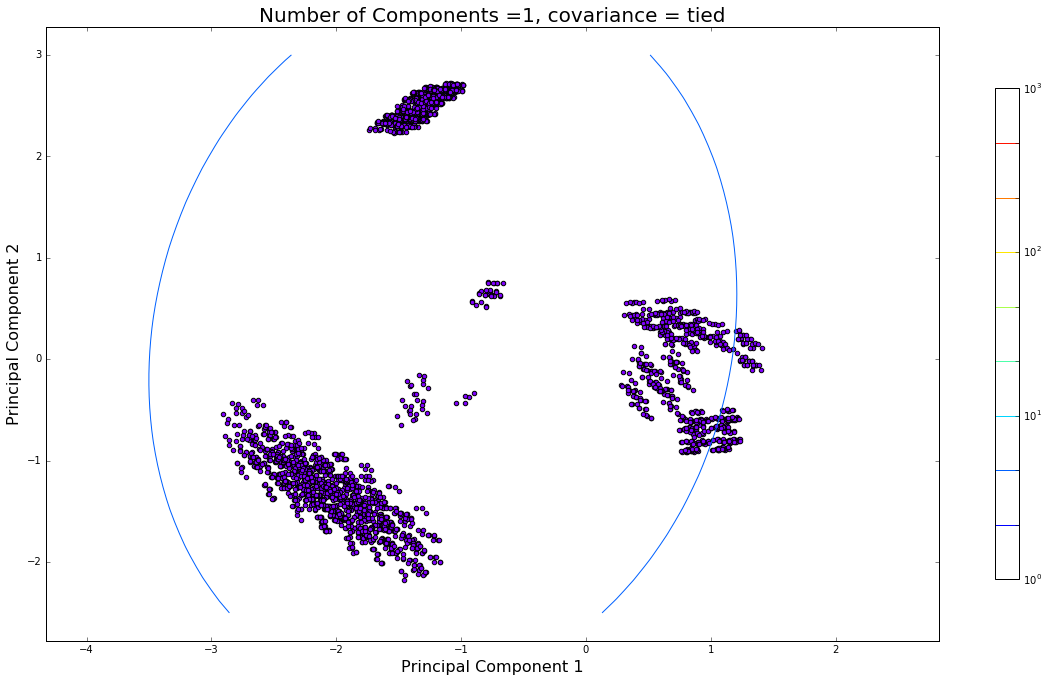

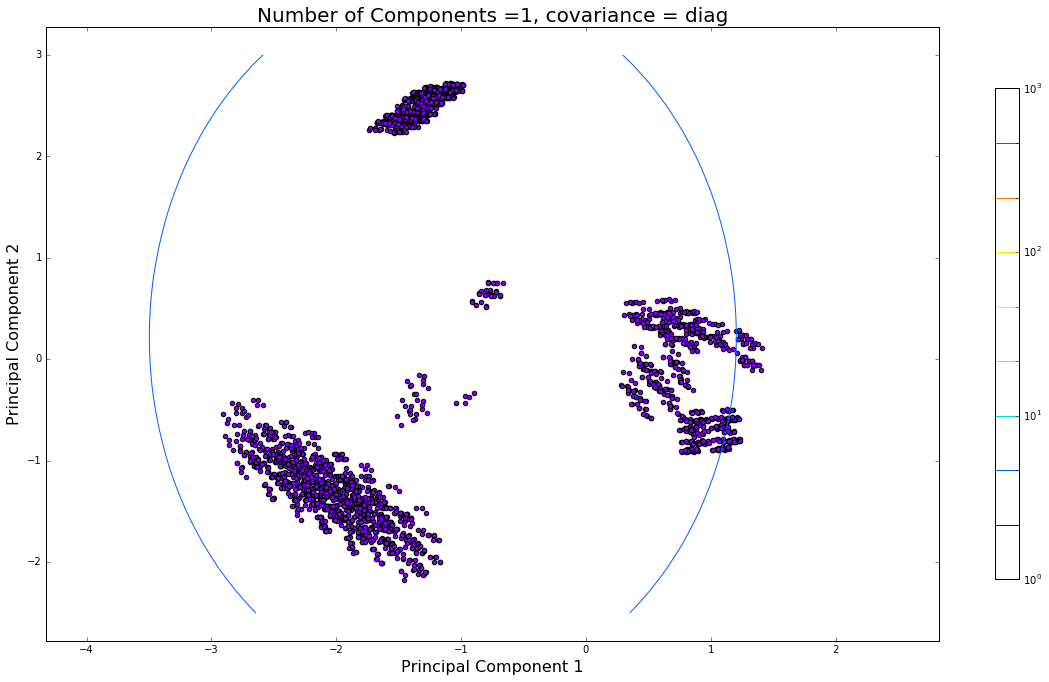

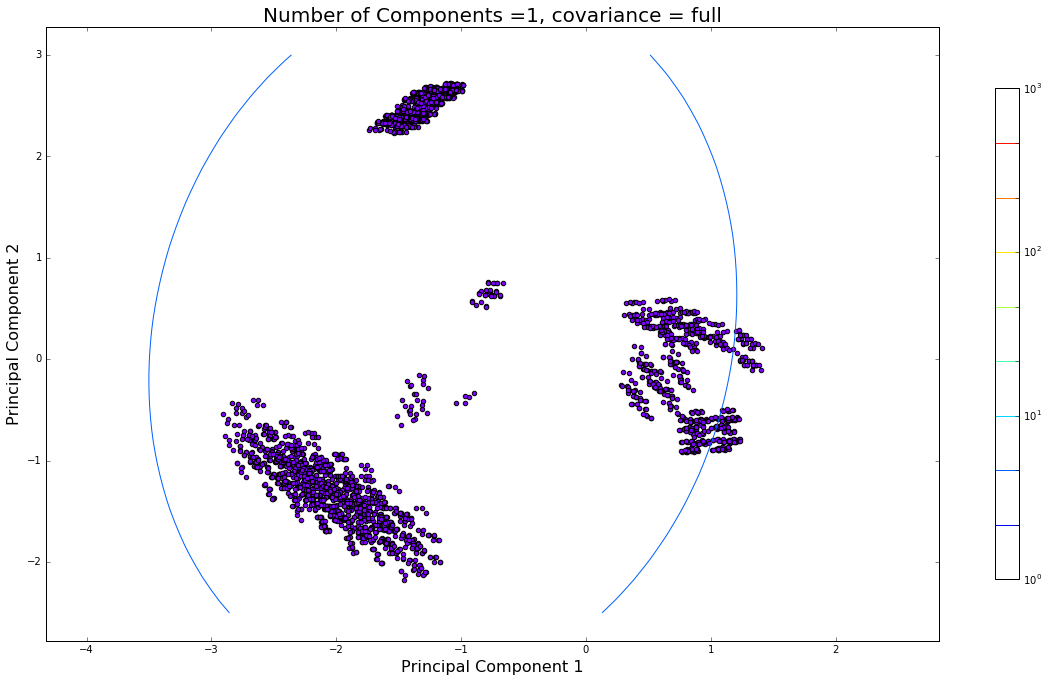

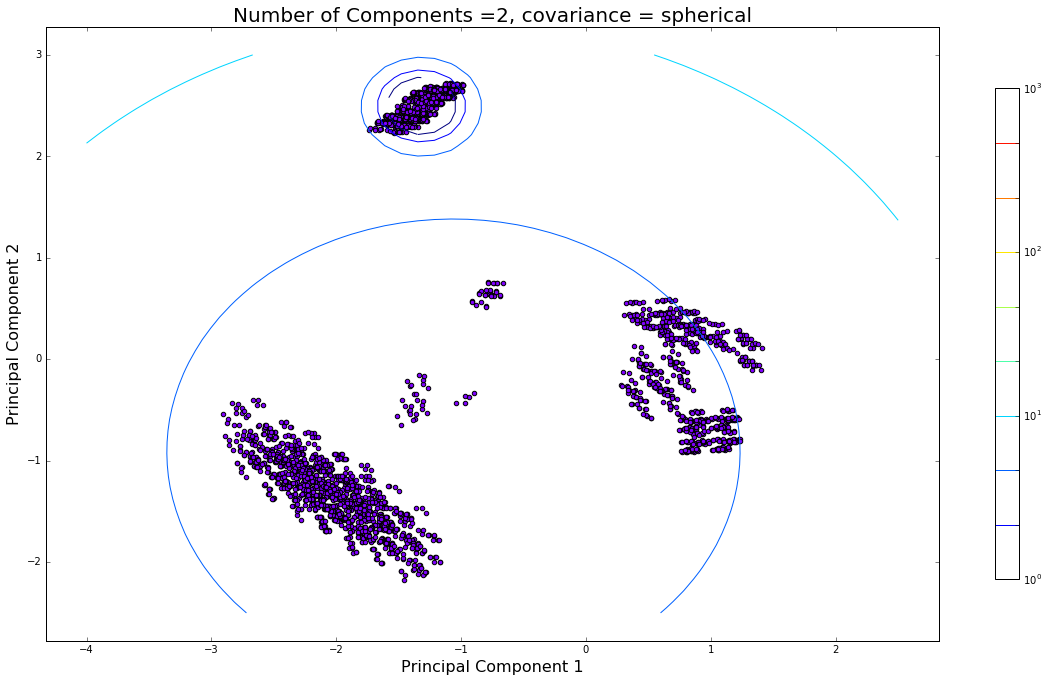

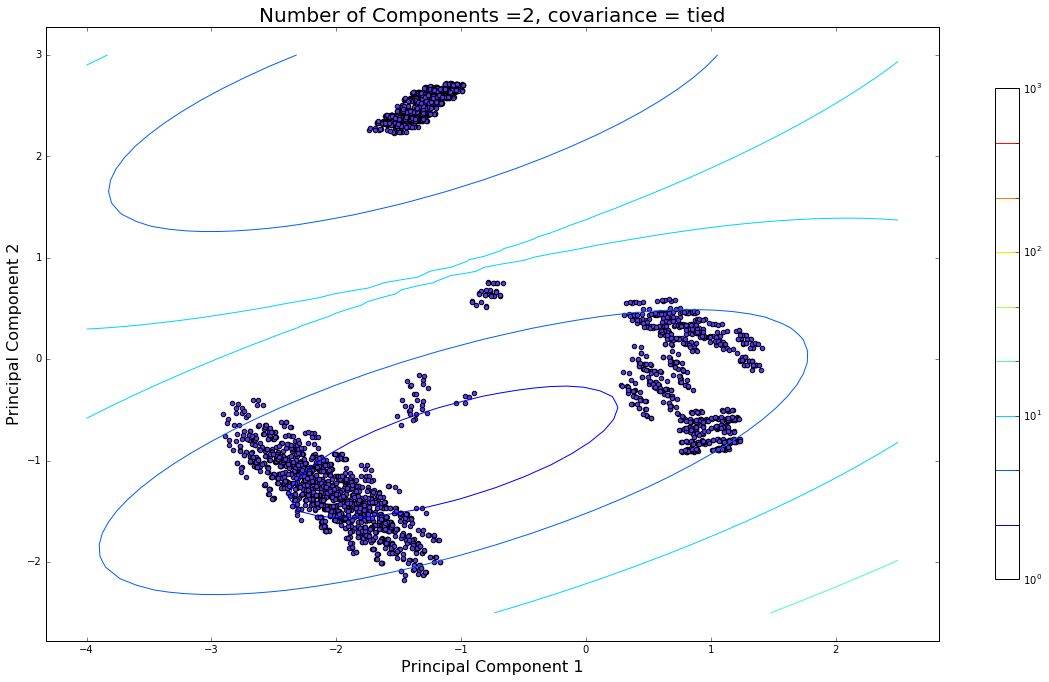

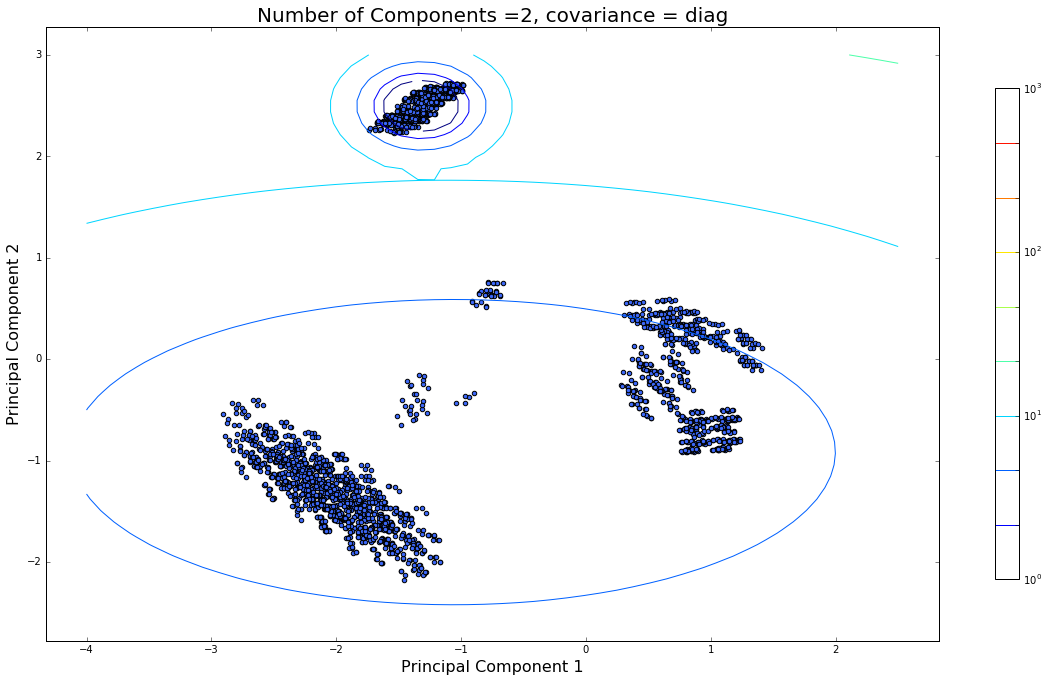

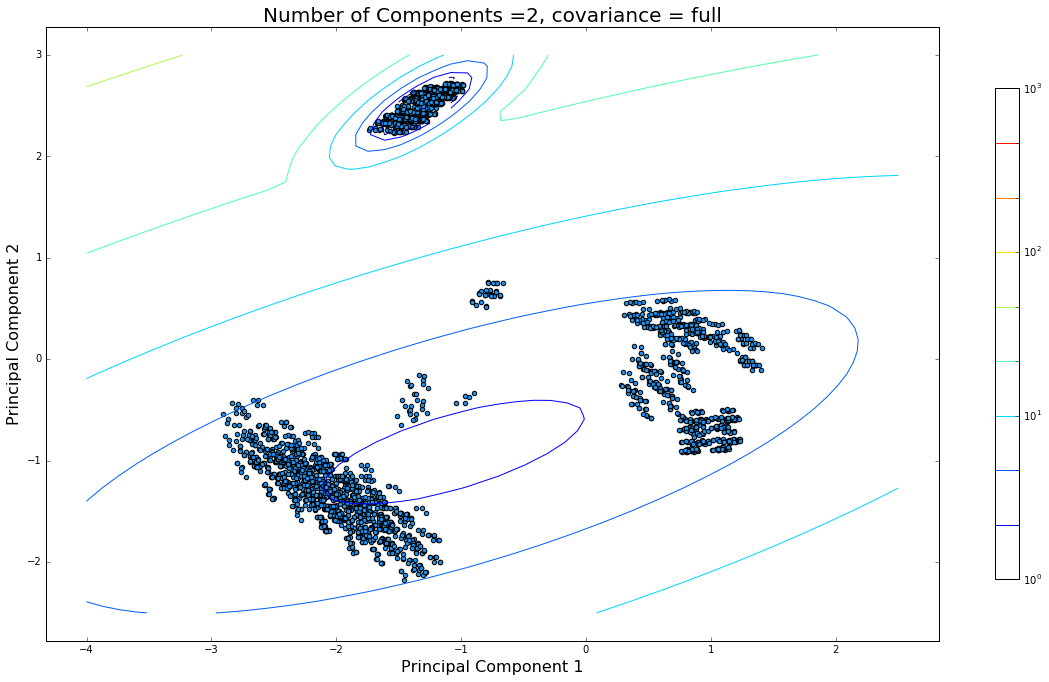

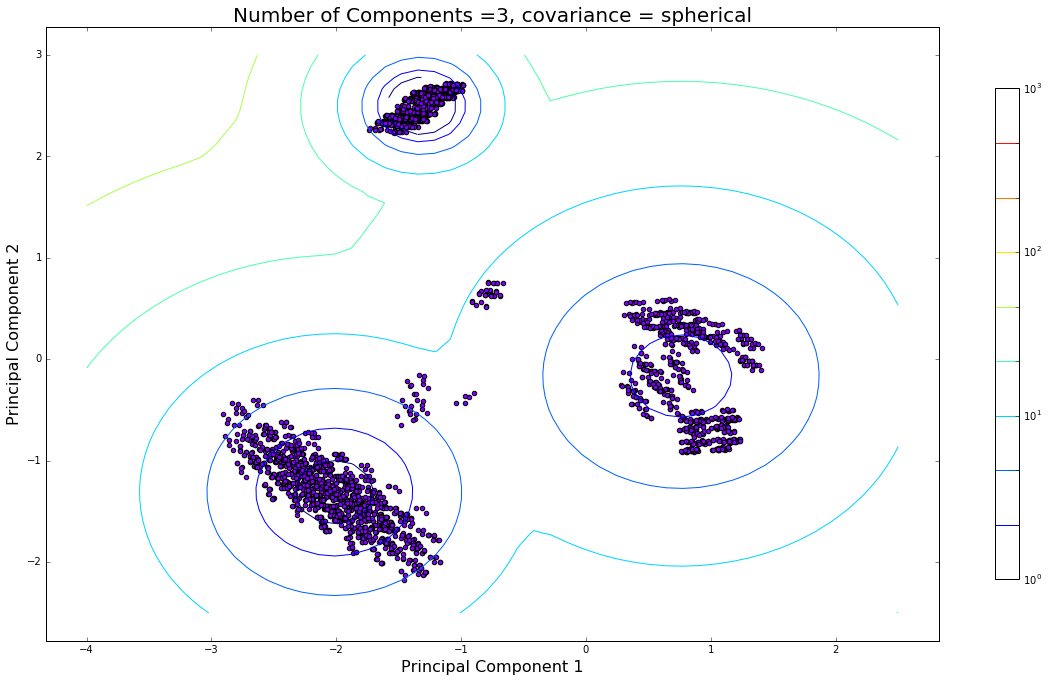

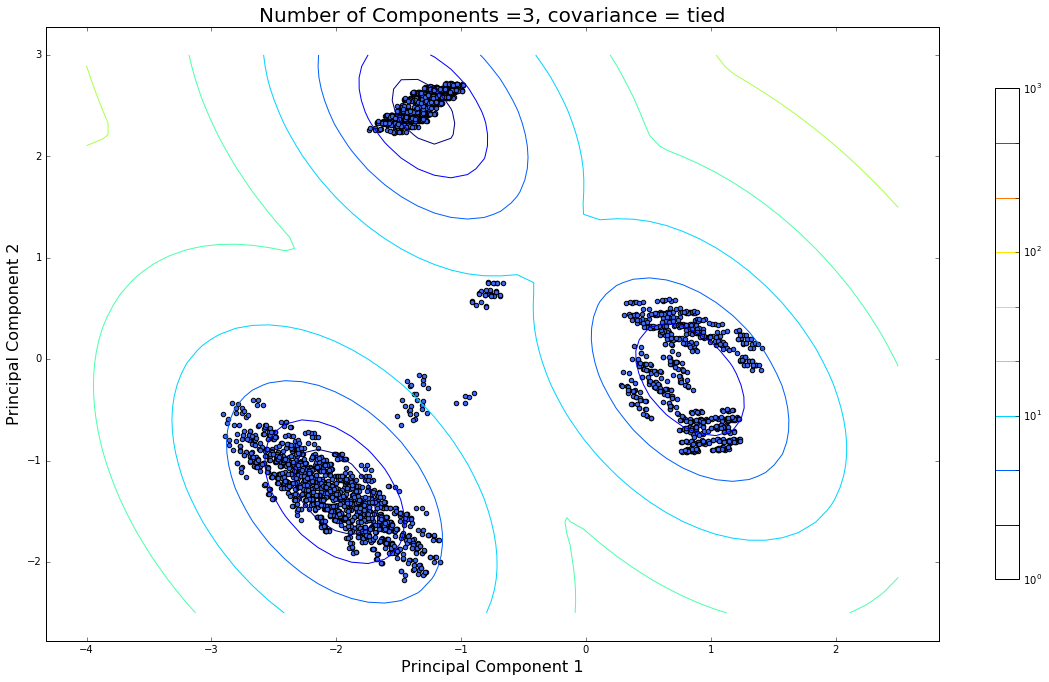

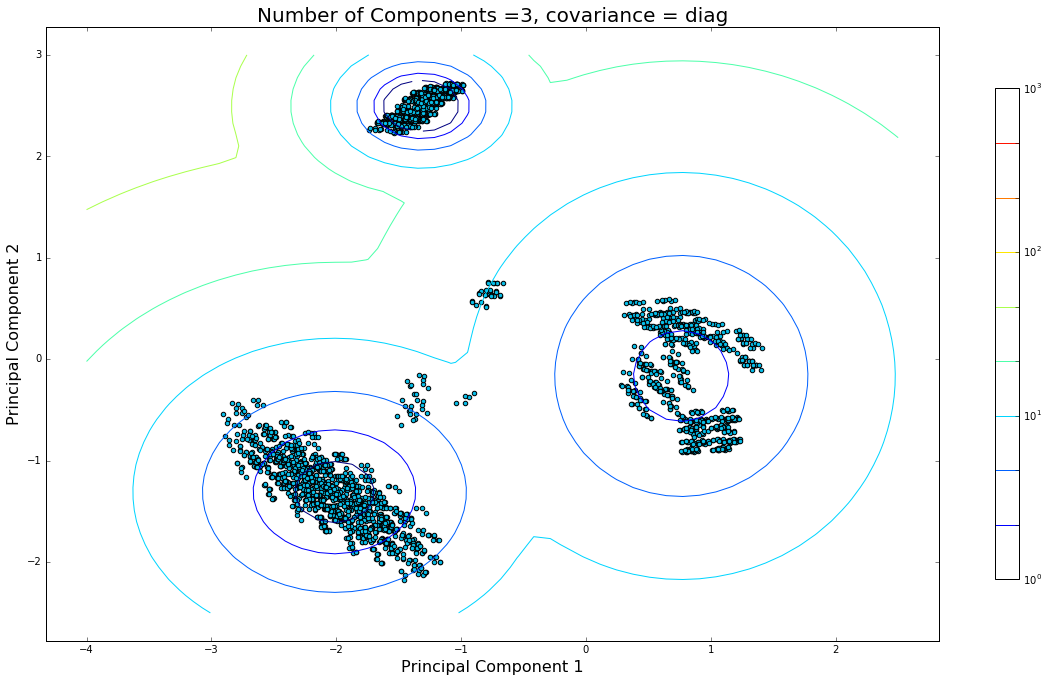

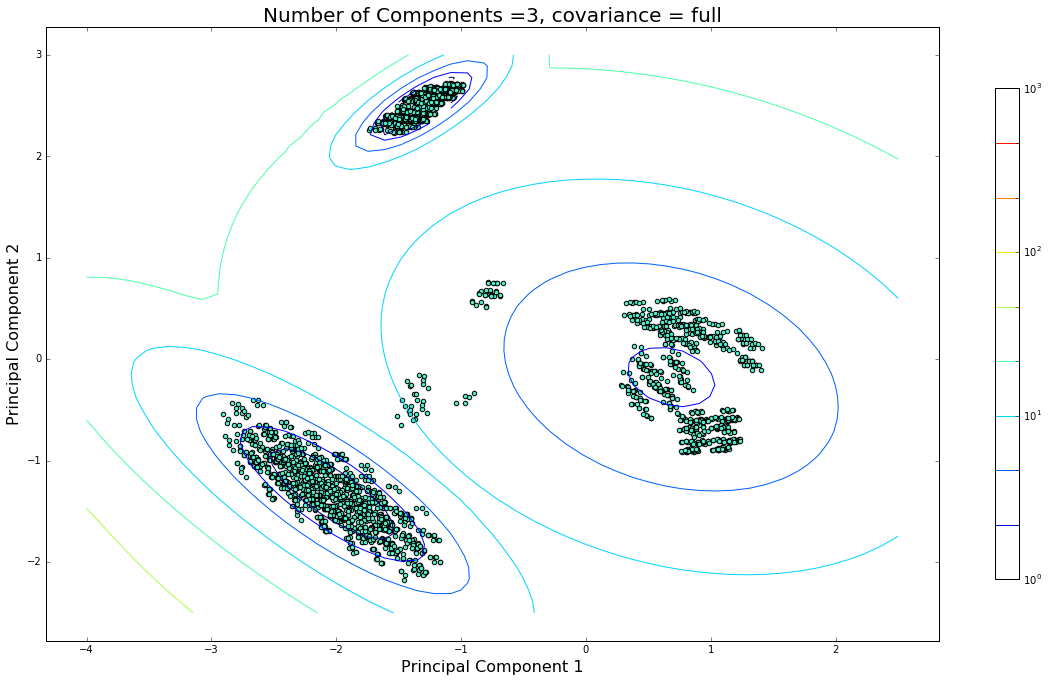

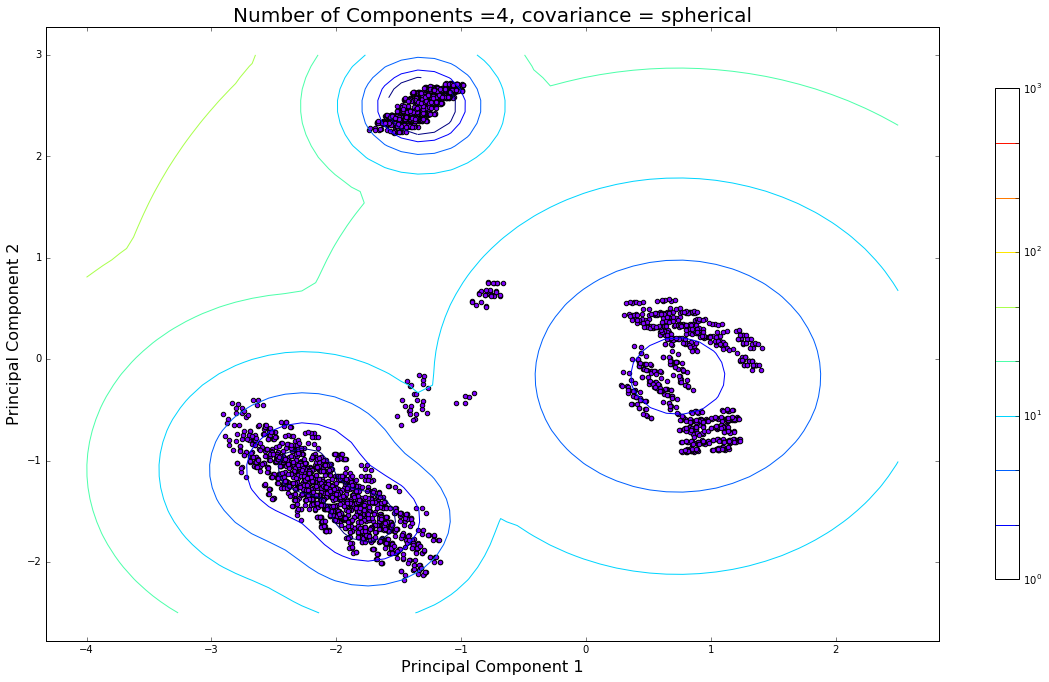

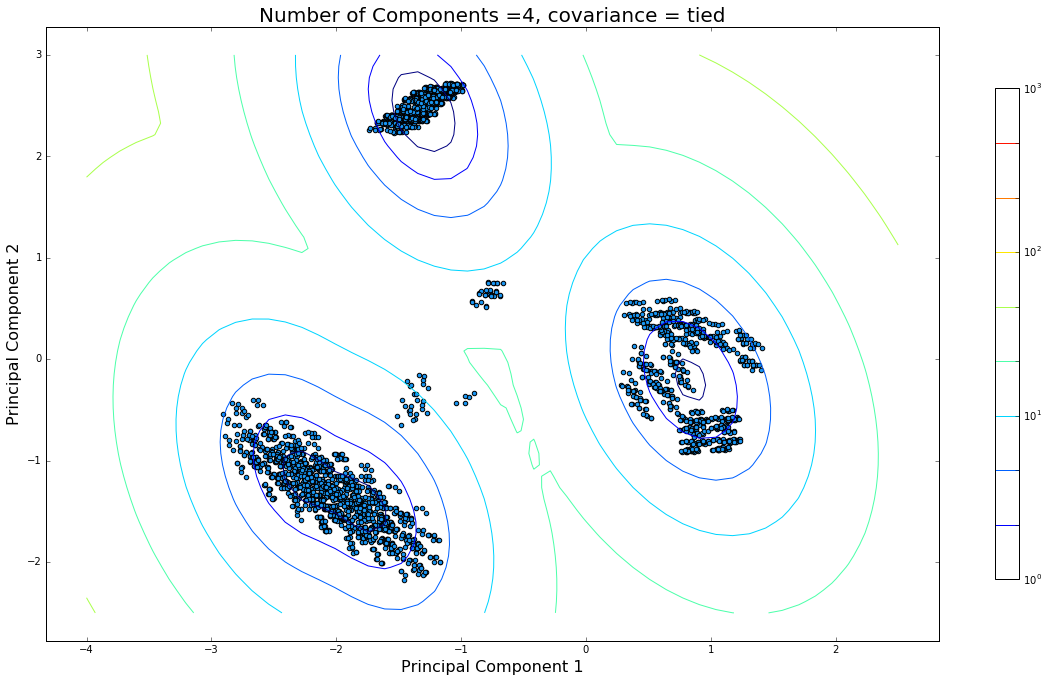

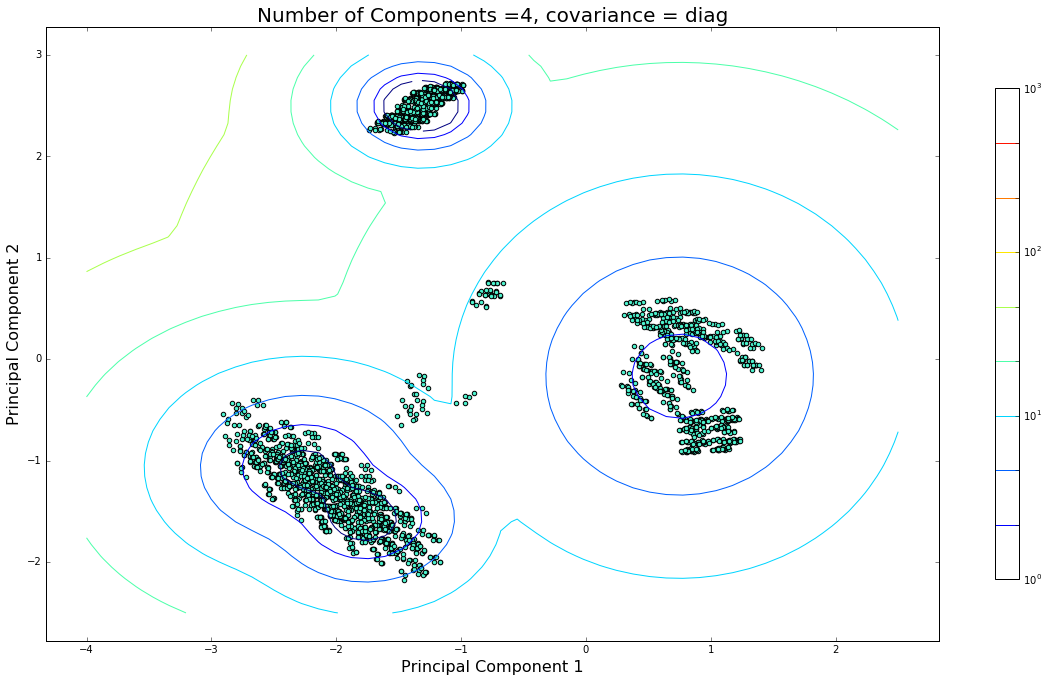

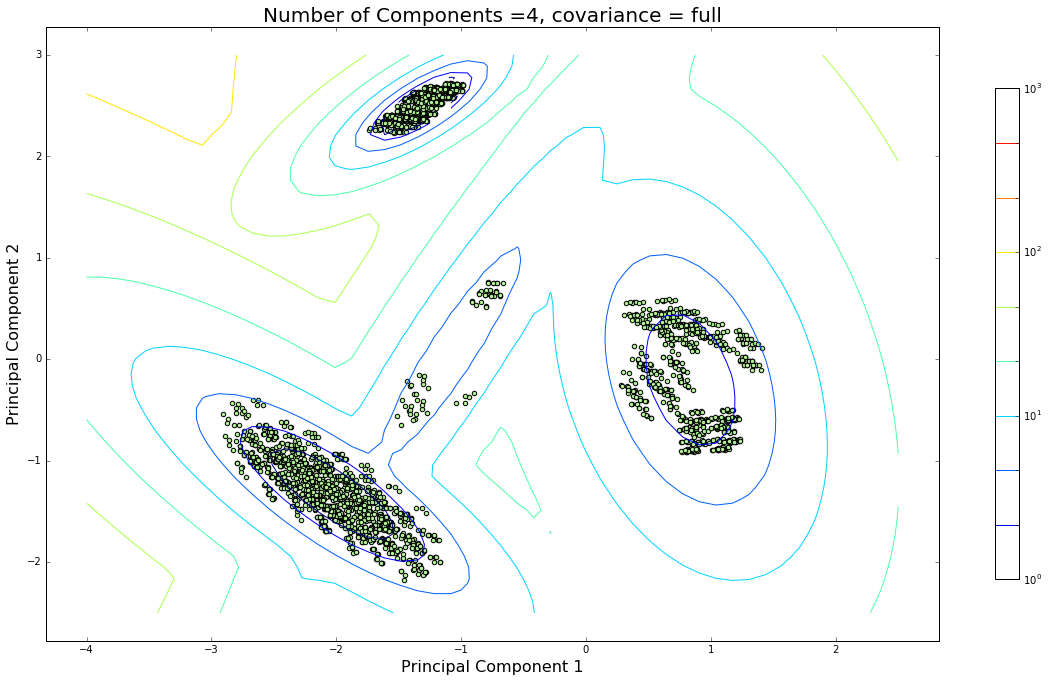

In [7]:
def P4():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_data = pca_model.fit_transform(train_data)
    
    # Parameters to vary specified to be 4
    componentNumber = 4
    
    # Covariance types are specified
    covarianceType = ['spherical', 'tied', 'diag', 'full']
    
    # get just the data on poisonous (Positive)
    pca_data_pos = pca_data[train_labels==1]
    
    # Set up 16 colors for plotting. Used when plotting 16 charts
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, 16)]
    
    # Iterate over 4 components
    for i in range(0, componentNumber):
            
        # Iterate over the 4 covariance types
        for j in range(0, len(covarianceType)):
            
            # fit a Gaussian Mixture Model with two components
            clf = GMM(n_components=i+1, covariance_type=str(covarianceType[j]))
            clf.fit(pca_data_pos)
        
            # display predicted scores by the model as a contour plot
            # set the data parameters as seen in 
            # http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
            # #example-mixture-plot-gmm-pdf-py
            x = np.linspace(-4., 2.5)
            y = np.linspace(-2.5, 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
            
            # Set plt object and plot size
            fig = plt.figure(figsize = (20,11))
            
            #plt.subplot(8,2,j+1)
            
            # Set the axes, limit whitespace
            plt.axis([-4,2.5,-2.5,3])
            
            # Compute the LogNorm
            norm=LogNorm(vmin=1.01, vmax=1000.0)
  
            # Plot the contour(s)
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            
            # Plot the pricipal component values
            plt.scatter(pca_data_pos[:, 0], pca_data_pos[:, 1], c = colors[j*i])

            # Set plot parameters
            plt.title('Number of Components =' + str(i+1) + ', covariance = ' + str(covarianceType[j]), fontsize=20) 
            plt.xlabel('Principal Component 1', fontsize=16)
            plt.ylabel('Principal Component 2', fontsize=16)
            plt.axis('tight')
            plt.show()
            
            
### STUDENT END ###

P4()

## (5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [8]:
def P5():
### STUDENT START ###

    # We need to have 2d projected data, use n_components = 2
    pca = PCA(n_components=2)
    
    # Generete PCA models for training and test data sets
    pca_train = pca.fit_transform(train_data)
    pca_test = pca.transform(test_data)
    
    # Isolate the Poisonous and nonPoisonous labels
    poisonous = pca_train[train_labels==1]
    nonpoisonous = pca_train[train_labels==0]
    
    # Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples
    gmm_model = GMM(n_components=4, covariance_type='full')
    
    # Model for positive exmaples
    gmm_model.fit(poisonous)

    # Get the score for positive examples
    poisonousModelScore = gmm_model.score(pca_test)
    
    # Model for negative exmaples
    gmm_model.fit(nonpoisonous)
    
    # Get the score  for negative examples
    nonpoisonousModelScore = gmm_model.score(pca_test)
    
    # Predict the test examples by choosing the label for which the model gives a larger probability
    predictedLabel = poisonousModelScore > nonpoisonousModelScore
    
    # Compute accuracy as : (Accurate Labels/(Accurate Lables + Inaccurate Labels))
    accuratePrediction = np.sum(predictedLabel == test_labels)
    accuracy = accuratePrediction/len(test_data)
    
    # Output the computed accuracy
    print ("Accuracy of 4-component full covariance GMM is {:.4f}.".format(accuracy))  
### STUDENT END ###

P5()

Accuracy of 4-component full covariance GMM is 0.9511.


### (6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

### Shankar Notes : Exchange with Todd
=============

On Mon, Dec 5, 2016 at 8:52 PM, natarajan shankar <shankarz@berkeley.edu> wrote:

#### Notes from email discussion

Assuming k factors, can I assume that there is no type of covariance matrix that exceeds size k x k?

[Todd] - Yes, by definition it's (k * k)
 
Here's how I am thinking:
Assuming k factors, it appears that the covariance matrix for type "full" will be with symmetric entries and at overall matrix size k x k.

[Todd] - Yes
 

For spherical, I surmise that covariance matrix will be k x k or a subset combination where each matrix is still symmetric but the subset composite cumulatively never exceeding size k x k

[Todd] - Just 1 parameter for spherical 

It generally appears to me that covariance matrices must always be  square. For tied and diag, are the matrices of size k x k but with non symmetric entries on the sides of the diagonal? 

[Todd] - For diagonal, the number of parameters is K.  For tied it's kxk, but only one, not times the number of components.
 
[Todd]

thanks,
shankar

http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/mixtureModels.pdf

The number of parameters in a GMM is O(Kd2), since each covariance matrix has O(d2) parameters. Although this is constant with respect to N (since this is a parametric model), it may still be a lot of parameters to estimate if d is large. In particular, estimating Σk can be a problem, since the empirical covariance matrix may not be positive definite. One common restriction is to assume a diagonal matrix, Σk = diag(σk21 , . . . , σk2d ). Another even stronger restriction is to assume a spherical matrix, Σk = σk2Id. In general, we can use Gaussian graphical models to represent each component density using a number of parameters that is anywhere between 1 and O(d2), depending on the conditional independence assumptions encoded in the graph. We can also impose priors on Σk and use MAP estimates, or the posterior mean, instead of the MLE.
Orthogonal to the issue of how to represent Σk within each cluster is how to represent the dependencies between the parameters across clusters. A common assumption is that all the lusters have the same “shape”, i.e. Σk is tied across classes.

In [9]:
def P6():
### STUDENT START ###

    # Covariance types
    #     Diagonal : Gaussians with diagonal covariance matrices.
    #     Full: Gaussians with full covariance
    #     Spherical: Spherical Gaussians: variance is the same along all 
    #                    axes and zero across-axes.
    #     Tied: Gaussians with a tied covariance matrix; the same covariance 
    #                     matrix is shared by all the gaussians.
    # Set up basic parameters
    covariance_types = ['diag', 'full', 'tied', 'spherical']
    
    # set up other parameters
    maxpca_comp = 50  
    num_classes = 2
    
    # Preserve the best seen metrics
    best_PCA = 0
    best_GMM = 0
    best_Covariance = ""
    
    # Variable for keeping track of computed accuracy. Only the best
    # accuracy value will be kept. Others are dropped
    best_accuracy = 0
    
    # Loop through PCA components, GMM components and Covariance types
    # Likley practically best to start with 2 PCA components but because this is
    # computation, we'll start with 1
    for num_pca in range(1, maxpca_comp+1):
        for num_gmm in range(1, maxpca_comp+1):
            
            # Cut down on compute a little bit. We don't want too many Gaussians
            # This refinement was done only after testing with 50 was completed
            # and results were observed. Best results happen at GMM ~ 3
            if (num_gmm > 10):
                continue
                
            for covariance in covariance_types: 
                
                # Compute the total number of parameters per formula
                # See Shankar + Todd discussion in cell above
                if covariance is 'diag':
                    nparam = (num_pca + num_pca)*num_gmm*num_classes
                elif covariance is 'full':
                    nparam = (num_pca+num_pca*num_pca)*num_gmm*num_classes
                elif covariance is 'tied':
                    # Tied : Gaussians with a tied covariance matrix; the same 
                    # covariance matrix is shared by all the gaussians.
                    nparam = (num_pca)*num_gmm*num_classes+num_pca*num_pca
                else: # covariance is 'spherical'
                    # A covariance matrix C is called isotropic, or spherical, if it is 
                    # proportionate to the identity matrix. i.e 
                    # if it is diagonal and all elements on the diagonal are equal.
                    nparam = (num_pca+1) * num_gmm * num_classes
                
                # go to next combination if max parameters has been exceeded
                if nparam > maxpca_comp: 
                    continue
                
                # NOTE: 
                # Can this PCA model setup be done outside these enclosing loops 
                # to save compute time?
                # Don't know the underlying implementation of PCA and so play it safe and 
                # do it within the loop. Revisit at later time.
                #
                # Set up the model and the transformations, these do not change 
                # as parameters and hyperparameters change?? But for now recompute
                # with every parameter change. - Revisit later
                pca = PCA(n_components=num_pca)
                pca_train = pca.fit_transform(train_data)
                pca_test = pca.transform(test_data)
                
                # Train using selected parameters
                train_model = pca_train[:, :num_pca]
                
                # fit GMM models
                gmm_model = GMM(n_components=num_gmm, covariance_type=covariance)
                gmm_model.fit(train_model[train_labels==1])
                
                # Get the score for positive examples
                poisonousModelScore = gmm_model.score(pca_test)
    
                gmm_model = GMM(n_components=num_gmm, covariance_type=covariance)
                gmm_model.fit(train_model[train_labels==0])
                
                # Get the score  for negative examples
                nonpoisonousModelScore = gmm_model.score(pca_test)
    
                # Predict the test examples by choosing the label for which the model gives 
                # a larger probability
                predictedLabel = poisonousModelScore > nonpoisonousModelScore
            
                # Compute accuracy where 
                # Accuracy = accurate labels /(accurate labels = inaccurate labels)
                accuratePrediction = np.sum(predictedLabel == test_labels)
                accuracy = accuratePrediction/len(test_data)
                
                # For debugging purposes
                #if  covariance is 'tied':
                #print("PCA {} GMM {} , covariance {} accuracy {}".format(num_pca, num_gmm, covariance, accuracy))
             
                # Update the best results metrics
                if accuracy > best_accuracy:
                    best_PCA = num_pca
                    best_GMM = num_gmm
                    best_Covariance = covariance
                    best_accuracy = np.round(accuracy, 4)
    
    # Cycling is complete. Now, print out the best result
    print("The combination with best accuracy is:\n \
        {} PCA Components, {} GMM, \"{}\" covariance, with prediction accuracy {}".
                format(best_PCA, best_GMM, best_Covariance, best_accuracy))
                
### STUDENT END ###

P6()

The combination with best accuracy is:
         7 PCA Components, 3 GMM, "spherical" covariance, with prediction accuracy 0.9733
